In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
df = pd.read_csv('data/treasury_rates.csv')

In [3]:
df

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
...,...,...,...,...,...,...,...
9188,2021-05-07,0.04,0.05,0.14,0.77,1.6,2.28
9189,2021-05-10,0.04,0.05,0.16,0.8,1.63,2.32
9190,2021-05-11,0.04,0.05,0.16,0.8,1.64,2.35
9191,2021-05-12,0.04,0.05,0.16,0.87,1.69,2.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    9193 non-null   object
 1   DGS6MO  9193 non-null   object
 2   DGS1    9193 non-null   object
 3   DGS2    9193 non-null   object
 4   DGS5    9193 non-null   object
 5   DGS10   9193 non-null   object
 6   DGS30   9193 non-null   object
dtypes: object(7)
memory usage: 502.9+ KB


* Date needs to be set to datetime
* Other values should be floats.  I suspect this is because the null values are '.'

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    9193 non-null   datetime64[ns]
 1   DGS6MO  9193 non-null   object        
 2   DGS1    9193 non-null   object        
 3   DGS2    9193 non-null   object        
 4   DGS5    9193 non-null   object        
 5   DGS10   9193 non-null   object        
 6   DGS30   9193 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 502.9+ KB


In [7]:
df.head(20)

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
5,1986-02-25,7.43,7.59,7.89,8.21,8.4,8.6
6,1986-02-26,7.42,7.57,7.88,8.07,8.36,8.54
7,1986-02-27,7.36,7.48,7.72,7.91,8.15,8.32
8,1986-02-28,7.36,7.43,7.71,7.91,8.13,8.27
9,1986-03-03,7.3,7.35,7.55,7.76,7.99,8.16


* The missing data here is from Christmas and New Years, which makes sense since the market is closed.
* I'll fill in the missing data from the value of the previous day.

In [8]:
df = df.replace('.', np.nan).ffill(axis=0)

In [9]:
df

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
...,...,...,...,...,...,...,...
9188,2021-05-07,0.04,0.05,0.14,0.77,1.6,2.28
9189,2021-05-10,0.04,0.05,0.16,0.8,1.63,2.32
9190,2021-05-11,0.04,0.05,0.16,0.8,1.64,2.35
9191,2021-05-12,0.04,0.05,0.16,0.87,1.69,2.4


In [10]:
df = df.rename(columns={'DATE': 'date',
                        'DGS6MO': 'mo_6',
                        'DGS1': 'yr_1',
                        'DGS2': 'yr_2',
                        'DGS5': 'yr_5',
                        'DGS10': 'yr_10',
                        'DGS30': 'yr_30'})

In [11]:
df.set_index('date', inplace=True)

In [12]:
df = df['1989':]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


In [15]:
df.iloc[:,1:] = df.iloc[:,1:].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


In [17]:
df.describe()

,mo_6,yr_1,yr_2,yr_5,yr_10,yr_30
count,8444,8444.00,8444.00,8444.00,8444.00,8444.00
unique,825,874.00,911.00,901.00,861.00,792.00
top,0.08,0.11,0.27,1.65,1.92,3.02
freq,153,179.00,96.00,33.00,27.00,46.00


In [18]:
df

,mo_6,yr_1,yr_2,yr_5,yr_10,yr_30
date,,,,,,
1989-01-02,8.67,9.02,9.14,9.14,9.14,9
1989-01-03,8.77,9.11,9.21,9.25,9.23,9.09
1989-01-04,8.87,9.14,9.25,9.24,9.22,9.08
1989-01-05,8.97,9.22,9.32,9.32,9.27,9.1
1989-01-06,8.97,9.2,9.32,9.3,9.25,9.06
...,...,...,...,...,...,...
2021-05-07,0.04,0.05,0.14,0.77,1.6,2.28
2021-05-10,0.04,0.05,0.16,0.8,1.63,2.32
2021-05-11,0.04,0.05,0.16,0.8,1.64,2.35


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

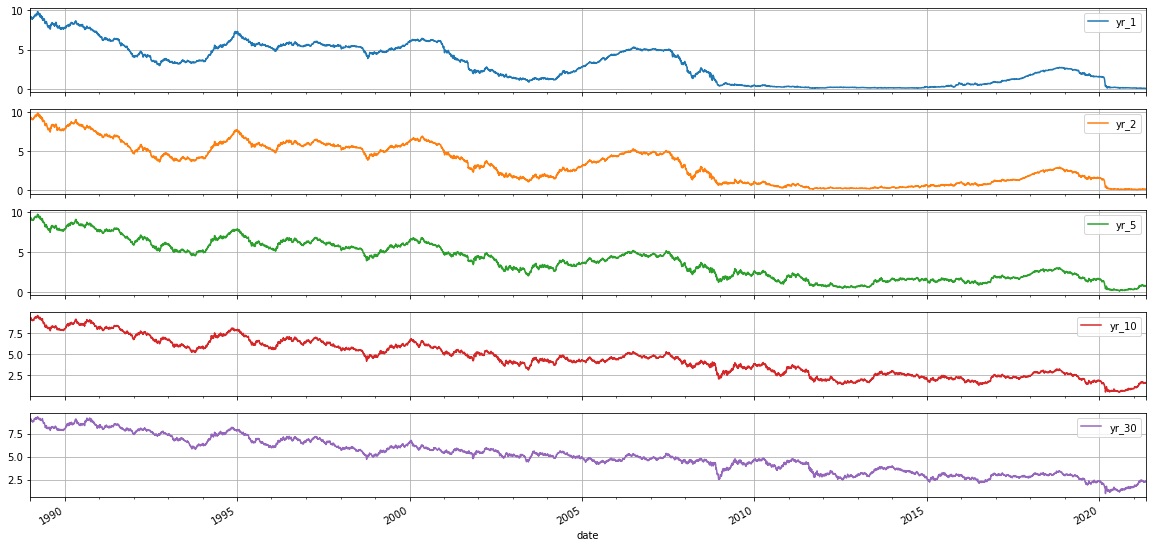

In [19]:
df.plot(subplots=True, grid=True)

(array([ 857., 1697., 1072.,  733., 1055., 1019., 1074.,  434.,  387.,
         116.]),
 array([0.19 , 1.146, 2.102, 3.058, 4.014, 4.97 , 5.926, 6.882, 7.838,
        8.794, 9.75 ]),
 <BarContainer object of 10 artists>)

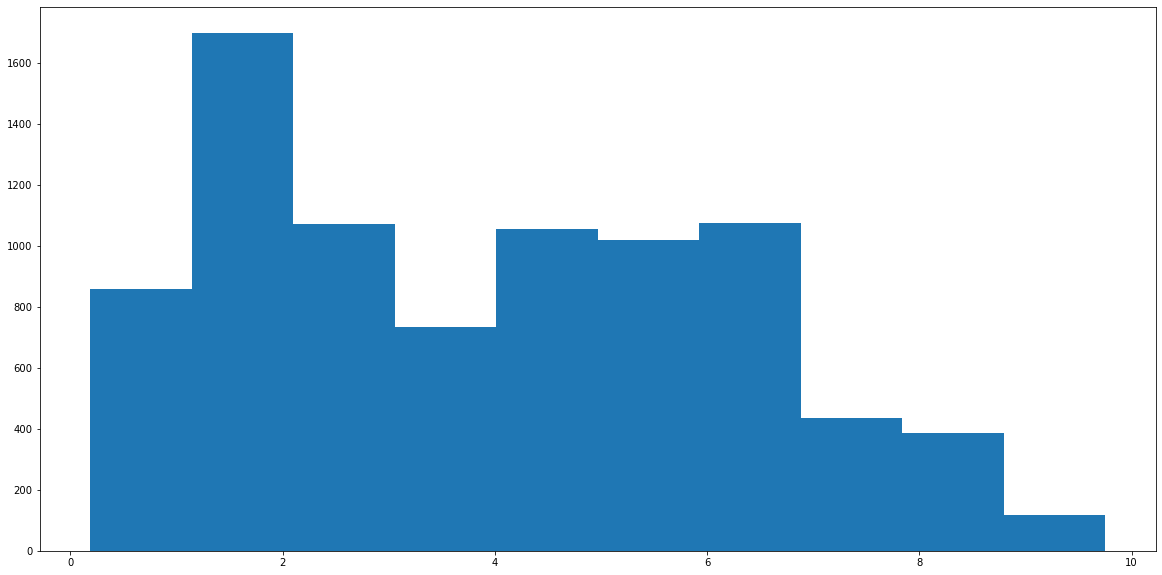

In [20]:
plt.hist(df['yr_5'])

In [21]:
roll_mean = df['yr_30'].rolling(window=30, center=False).mean()
roll_std = df['yr_30'].rolling(window=30, center=False).std()

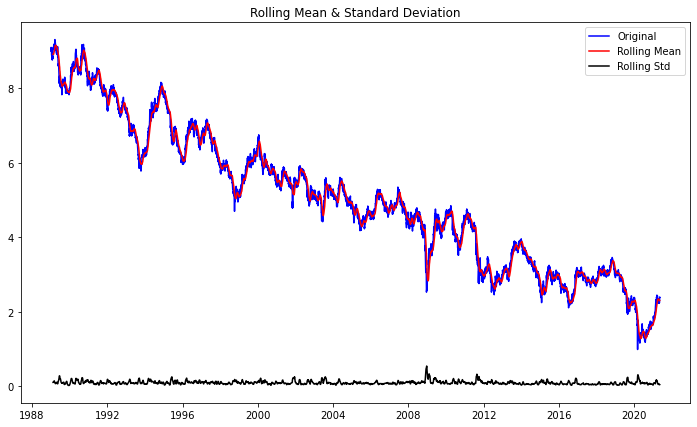

In [22]:
fig = plt.figure(figsize=(12,7))
plt.plot(df['yr_30'], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [23]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['yr_30'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-1.647587249257941, 0.45829904769522073, 26, 8417, {'1%': -3.4311271528357445, '5%': -2.8618834482113287, '10%': -2.566952812608929}, -26212.031843745797)


In [24]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -1.647587
p-value                           0.458299
#Lags Used                       26.000000
Number of Observations Used    8417.000000
Critical Value (1%)              -3.431127
Critical Value (5%)              -2.861883
Critical Value (10%)             -2.566953
dtype: float64


* Based on the rolling mean as well as the Dickey-Fuller test, our data as it stands is not stationary.

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
...,...,...,...,...,...,...,...
9188,2021-05-07,0.04,0.05,0.14,0.77,1.6,2.28
9189,2021-05-10,0.04,0.05,0.16,0.8,1.63,2.32
9190,2021-05-11,0.04,0.05,0.16,0.8,1.64,2.35
9191,2021-05-12,0.04,0.05,0.16,0.87,1.69,2.4
